In [2]:
# For navigation in the folders
import pathlib
from pathlib import Path

# Import for date and time operations
from datetime import datetime
from time import strptime, strftime

# For progress bars
from tqdm import tqdm

# For plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# For data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns # type: ignore
import PIL
import pickle

# Seaborn settings for clean plots
sns.set(style="white", palette="muted")
sns.despine()

# Example path usage with pathlib
# current_dir = Path.cwd()
# another_example = current_dir / 'subfolder' / 'file.txt'


ModuleNotFoundError: No module named 'seaborn'

In [3]:
import yfinance as yf
import os
import tensorflow as tf
import pandas as pd

# List of Nifty 50 stock tickers
nifty50_tickers = [
    "ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS",
    "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
    "BHARTIARTL.NS", "BPCL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS",
    "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS",
    "HDFC.NS", "HDFCBANK.NS", "HDFCLIFE.NS", "HEROMOTOCO.NS", "HINDALCO.NS",
    "HINDUNILVR.NS", "ICICIBANK.NS", "INDUSINDBK.NS", "INFY.NS", "ITC.NS",
    "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS", "M&M.NS", "MARUTI.NS",
    "NTPC.NS", "ONGC.NS", "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS",
    "SBIN.NS", "SUNPHARMA.NS", "TATACONSUM.NS", "TATAMOTORS.NS",
    "TATASTEEL.NS", "TCS.NS", "TECHM.NS", "TITAN.NS", "ULTRACEMCO.NS",
    "UPL.NS", "WIPRO.NS"
]

# Create a directory to store CSV files if it doesn't exist
if not os.path.exists('nifty50_data'):
    os.makedirs('nifty50_data')

def download_data(ticker):
    """ Download stock data for a specified date range and save it locally as CSV. """
    stock_data = yf.Ticker(ticker)
    data = stock_data.history(start="2015-03-11", end="2024-09-05")

    # Save the data to a CSV file
    csv_file = f'nifty50_data/{ticker}.csv'
    data.to_csv(csv_file)

    return data

@tf.function
def convert_to_tensor(data):
    """ Convert pandas DataFrame to TensorFlow tensor. """
    # Convert DataFrame to numpy array first, then to tensor
    tensor_data = tf.convert_to_tensor(data, dtype=tf.float64)
    return tensor_data

# Process each stock
for ticker in nifty50_tickers:
    print(f"Downloading data for {ticker}...")

    # Download data first (outside of the TensorFlow graph)
    stock_data = download_data(ticker)

    # Drop any non-numeric columns (like dates) for TensorFlow compatibility
    stock_data_numeric = stock_data.drop(columns=['Dividends', 'Stock Splits'], errors='ignore')

    # Convert to tensor (inside TensorFlow's symbolic graph)
    tensor_data = convert_to_tensor(stock_data_numeric)

    print(f"Tensor data for {ticker}: {tensor_data.shape}")

print("All data downloaded, converted to tensors, and saved.")


ModuleNotFoundError: No module named 'yfinance'

In [3]:
from pathlib import Path
import tensorflow as tf
import pandas as pd
import numpy as np  # Missing import

# Define the path to the data directory
data_dir = Path.cwd() / 'nifty50_data'

# List all files in the directory
files_tags = [file for file in data_dir.iterdir() if file.is_file()]

# Remove hidden files (those starting with a dot)
files_tags = [file for file in files_tags if not file.name.startswith('.')]

# Extract stock names from the filenames (using Path.stem to remove the extension)
stocks = [file.stem for file in files_tags]

stocks = tf.convert_to_tensor(stocks)

In [4]:
import tensorflow as tf
# Configure TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Distributed training strategy
strategy = tf.distribute.MirroredStrategy()

In [5]:
# Initialize lists to store kept and not-kept stocks
kept_stocks = []
not_kept_stocks = []

# Process each stock file in the directory
for s in tqdm(files_tags):
    # Build the full path for each stock file
    file_path = data_dir / s  # Add `.csv` extension to stock name

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Print the length of the DataFrame (number of rows)
    print(f"{s.name}: Number of rows = {len(df)}")

    # Filter: Keep only files with exactly 1238 rows (or any other specified length)
    if len(df) != 2341:
        not_kept_stocks.append(s.name)
    else:
        kept_stocks.append(s.name)

# After processing, print the results
print(f"Kept Stocks: {kept_stocks}")
print(f"Not Kept Stocks: {not_kept_stocks}")

 20%|██        | 10/49 [00:00<00:00, 91.11it/s]

HDFC.NS.csv: Number of rows = 0
DRREDDY.NS.csv: Number of rows = 2341
JSWSTEEL.NS.csv: Number of rows = 2341
TECHM.NS.csv: Number of rows = 2341
HDFCLIFE.NS.csv: Number of rows = 1677
ADANIPORTS.NS.csv: Number of rows = 2341
RELIANCE.NS.csv: Number of rows = 2341
HDFCBANK.NS.csv: Number of rows = 2341
APOLLOHOSP.NS.csv: Number of rows = 2341
INFY.NS.csv: Number of rows = 2341
AXISBANK.NS.csv: Number of rows = 2341
M&M.NS.csv: Number of rows = 2341
ULTRACEMCO.NS.csv: Number of rows = 2341
TITAN.NS.csv: Number of rows = 2341
SBIN.NS.csv: Number of rows = 2341
UPL.NS.csv: Number of rows = 2341
BHARTIARTL.NS.csv: Number of rows = 2341
ASIANPAINT.NS.csv: Number of rows = 2341


 61%|██████    | 30/49 [00:00<00:00, 91.18it/s]

NTPC.NS.csv: Number of rows = 2341
SUNPHARMA.NS.csv: Number of rows = 2341
DIVISLAB.NS.csv: Number of rows = 2341
ICICIBANK.NS.csv: Number of rows = 2341
HCLTECH.NS.csv: Number of rows = 2341
BAJAJFINSV.NS.csv: Number of rows = 2341
BAJFINANCE.NS.csv: Number of rows = 2341
COALINDIA.NS.csv: Number of rows = 2341
MARUTI.NS.csv: Number of rows = 2341
HINDALCO.NS.csv: Number of rows = 2341
BRITANNIA.NS.csv: Number of rows = 2341
HINDUNILVR.NS.csv: Number of rows = 2341
TATACONSUM.NS.csv: Number of rows = 2341
KOTAKBANK.NS.csv: Number of rows = 2341
INDUSINDBK.NS.csv: Number of rows = 2341
WIPRO.NS.csv: Number of rows = 2341
TATASTEEL.NS.csv: Number of rows = 2341
ADANIENT.NS.csv: Number of rows = 2341


100%|██████████| 49/49 [00:00<00:00, 90.31it/s]

ONGC.NS.csv: Number of rows = 2341
BAJAJ-AUTO.NS.csv: Number of rows = 2341
TATAMOTORS.NS.csv: Number of rows = 2341
TCS.NS.csv: Number of rows = 2341
POWERGRID.NS.csv: Number of rows = 2341
HEROMOTOCO.NS.csv: Number of rows = 2341
EICHERMOT.NS.csv: Number of rows = 2341
BPCL.NS.csv: Number of rows = 2341
GRASIM.NS.csv: Number of rows = 2341
ITC.NS.csv: Number of rows = 2341
LT.NS.csv: Number of rows = 2341
CIPLA.NS.csv: Number of rows = 2341
SBILIFE.NS.csv: Number of rows = 1709
Kept Stocks: ['DRREDDY.NS.csv', 'JSWSTEEL.NS.csv', 'TECHM.NS.csv', 'ADANIPORTS.NS.csv', 'RELIANCE.NS.csv', 'HDFCBANK.NS.csv', 'APOLLOHOSP.NS.csv', 'INFY.NS.csv', 'AXISBANK.NS.csv', 'M&M.NS.csv', 'ULTRACEMCO.NS.csv', 'TITAN.NS.csv', 'SBIN.NS.csv', 'UPL.NS.csv', 'BHARTIARTL.NS.csv', 'ASIANPAINT.NS.csv', 'NTPC.NS.csv', 'SUNPHARMA.NS.csv', 'DIVISLAB.NS.csv', 'ICICIBANK.NS.csv', 'HCLTECH.NS.csv', 'BAJAJFINSV.NS.csv', 'BAJFINANCE.NS.csv', 'COALINDIA.NS.csv', 'MARUTI.NS.csv', 'HINDALCO.NS.csv', 'BRITANNIA.NS.csv', 'H

In [6]:
kept_stock_rl = ['ITC.NS.csv','RELIANCE.NS.csv','ASIANPAINT.NS.csv','M&M.NS.csv','BRITANNIA.NS.csv']
# kept_stock_rl = kept_stocks

# kept_stock_rl = [kept_stocks[3], kept_stocks[24], kept_stocks[17], kept_stocks[22], kept_stocks[34]]
print(kept_stock_rl)
# American Electric Power Company, Inc -- Electric Utilities
# AmerisourceBergen Corporation -- Healthcare and Pharmaceuticals
# Boston Properties, Inc -- Real Estate (REIT)
# Apache Corporation. -- Oil & Gas
# Anadarko Petroleum Corporation -- Oil & Gas

['ITC.NS.csv', 'RELIANCE.NS.csv', 'ASIANPAINT.NS.csv', 'M&M.NS.csv', 'BRITANNIA.NS.csv']


In [7]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=e450b635f1cea51feb143152f1262f10128ae6bf1255b55efb89a979a1f0d628
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import ta  # If you haven't installed this library, you can install it using: !pip install ta

# Initialize lists to store 'open', 'close', 'high', 'low', and technical indicators values
list_open = []
list_close = []
list_high = []
list_low = []
list_macd = []
list_rsi = []
list_cci = []
list_adx = []

def add_noise(data, mean=0.0, std_dev=0.01):
    noise = np.random.normal(mean, std_dev, data.shape)
    return data + noise

# Loop over each kept stock file and extract 'open', 'close', 'high', 'low' columns
for s in tqdm(kept_stock_rl):
    # Build the full path for each stock file
    file_path = data_dir / s

    # Read the CSV file, fill missing data, and copy relevant columns
    data = pd.read_csv(file_path).bfill().copy()
    if 'Date' in data.columns:
        dates = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d').values
    else:
        dates = []

    # Convert dates to a TensorFlow tensor
    list_dates = tf.convert_to_tensor(dates, dtype=tf.string)
    # print(data)
    data = data[['Open', 'Close', 'High', 'Low']]

    # Calculate technical indicators
    data['MACD'] = ta.trend.MACD(data['Close']).macd()
    data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()
    data['CCI'] = ta.trend.CCIIndicator(data['High'], data['Low'], data['Close']).cci()
    data['ADX'] = ta.trend.ADXIndicator(data['High'], data['Low'], data['Close']).adx()

    # Append stock data to the respective lists
    list_open.append(data['Open'].values)
    list_close.append(data['Close'].values)
    list_high.append(data['High'].values)
    list_low.append(data['Low'].values)
    list_macd.append(data['MACD'].fillna(0).values)
    list_rsi.append(data['RSI'].fillna(0).values)
    list_cci.append(data['CCI'].fillna(0).values)
    list_adx.append(data['ADX'].fillna(0).values)

# Convert the lists to NumPy arrays and perform the necessary transpositions - Apply noise to each array
array_open = add_noise(np.transpose(np.array(list_open))[:-1])
array_open_of_the_day = add_noise(np.transpose(np.array(list_open))[1:])
array_close = add_noise(np.transpose(np.array(list_close))[:-1])
array_high = add_noise(np.transpose(np.array(list_high))[:-1])
array_low = add_noise(np.transpose(np.array(list_low))[:-1])
array_macd = add_noise(np.transpose(np.array(list_macd))[:-1])
array_rsi = add_noise(np.transpose(np.array(list_rsi))[:-1])
array_cci = add_noise(np.transpose(np.array(list_cci))[:-1])
array_adx = add_noise(np.transpose(np.array(list_adx))[:-1])

# Convert NumPy arrays to TensorFlow tensors for graph execution
tensor_open = tf.convert_to_tensor(array_open, dtype=tf.float32)
tensor_open_of_the_day = tf.convert_to_tensor(array_open_of_the_day, dtype=tf.float32)
tensor_close = tf.convert_to_tensor(array_close, dtype=tf.float32)
tensor_high = tf.convert_to_tensor(array_high, dtype=tf.float32)
tensor_low = tf.convert_to_tensor(array_low, dtype=tf.float32)
tensor_macd = tf.convert_to_tensor(array_macd, dtype=tf.float32)
tensor_rsi = tf.convert_to_tensor(array_rsi, dtype=tf.float32)
tensor_cci = tf.convert_to_tensor(array_cci, dtype=tf.float32)
tensor_adx = tf.convert_to_tensor(array_adx, dtype=tf.float32)

# Check the shape of the resulting tensors
print(f'Tensor open shape: {tensor_open.shape}')
print(f'Tensor open of the day shape: {tensor_open_of_the_day.shape}')
print(f'Tensor close shape: {tensor_close.shape}')
print(f'Tensor high shape: {tensor_high.shape}')
print(f'Tensor low shape: {tensor_low.shape}')
print(f'Tensor MACD shape: {tensor_macd.shape}')
print(f'Tensor RSI shape: {tensor_rsi.shape}')
print(f'Tensor CCI shape: {tensor_cci.shape}')
print(f'Tensor ADX shape: {tensor_adx.shape}')


 60%|██████    | 3/5 [00:00<00:00,  5.59it/s]<ipython-input-8-73e3b571f4f0>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MACD'] = ta.trend.MACD(data['Close']).macd()
<ipython-input-8-73e3b571f4f0>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()
<ipython-input-8-73e3b571f4f0>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Tensor open shape: (2340, 5)
Tensor open of the day shape: (2340, 5)
Tensor close shape: (2340, 5)
Tensor high shape: (2340, 5)
Tensor low shape: (2340, 5)
Tensor MACD shape: (2340, 5)
Tensor RSI shape: (2340, 5)
Tensor CCI shape: (2340, 5)
Tensor ADX shape: (2340, 5)


In [9]:
  tf.print(list_dates)

["2015-03-11" "2015-03-12" "2015-03-13" ... "2024-09-02" "2024-09-03" "2024-09-04"]


In [10]:
# Create the X array with the specified transformations
X_np = np.transpose(np.array([array_close / array_open,
                              array_high / array_open,
                              array_low / array_open,
                              array_macd,
                              array_rsi,
                              array_cci,
                              array_adx,
                              array_open_of_the_day / array_open]), axes=(0, 2, 1))

# Convert X to TensorFlow tensor for graph execution
X = tf.convert_to_tensor(X_np.astype(np.float32), dtype=tf.float32)
# Output the shape of X
print(f'X shape: {X.shape}')

X shape: (8, 5, 2340)


In [11]:
data = X
trading_period = data.shape[2]
nb_feature_map = data.shape[0]
nb_stocks = data.shape[1]

# Fix parameters of the network based on the number of stocks
m = nb_stocks
list_stock = [i for i in range(m)]

# Hyperparameter dictionaries
dict_hp_net = {
    'n_filter_1': 2,
    'n_filter_2': 20,
    'kernel1_size': (1, 3)
}

dict_hp_pb = {
    'batch_size': 64,
    'ratio_train': 0.7,
    'ratio_val': 0.1,
    'length_tensor': 12,
    'ratio_greedy': 0.50,
    'ratio_regul': 0.1
}

dict_hp_opt = {
    'regularization': 1e-8,
    'learning': 0.01,
    'reward_scale_factor': 1000
}

dict_fin = {
    'trading_cost': 0.25/100,
    'interest_rate': 0.02/250,
    'cash_bias_init': 0.7
}

dict_train = {
    'pf_init_train': 10000000,
    'w_init_train': 'd',  # dynamic initialization
    'n_episodes': 50,
    'n_batches': 100
}

dict_test = {
    'pf_init_test': 10000000,
    'w_init_test': 'd'  # dynamic initialization
}

# Network hyperparameters
n_filter_1 = dict_hp_net['n_filter_1']
n_filter_2 = dict_hp_net['n_filter_2']
kernel1_size = dict_hp_net['kernel1_size']

# Problem hyperparameters
batch_size = dict_hp_pb['batch_size']
total_steps_train = int(dict_hp_pb['ratio_train'] * trading_period)
total_steps_val = int(dict_hp_pb['ratio_val'] * trading_period)
total_steps_test = trading_period - total_steps_train - total_steps_val
n = dict_hp_pb['length_tensor']

# Optimization hyperparameters
regularization = dict_hp_opt['regularization']
learning = dict_hp_opt['learning']
reward_scale_factor = dict_hp_opt['reward_scale_factor']
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning)

# Finance parameters
trading_cost = dict_fin['trading_cost']
interest_rate = dict_fin['interest_rate']
cash_bias_init = dict_fin['cash_bias_init']

ratio_greedy = tf.constant(dict_hp_pb['ratio_greedy'], dtype=tf.float32)

# Training parameters
w_init_train = tf.convert_to_tensor([1.0] + [0.0] * m, dtype=tf.float32)  # Convert weight initialization to tensor
pf_init_train = tf.convert_to_tensor(dict_train['pf_init_train'], dtype=tf.float32)  # Portfolio initialization
n_episodes = tf.convert_to_tensor(dict_train['n_episodes'], dtype=tf.int32)
n_batches = tf.convert_to_tensor(dict_train['n_batches'], dtype=tf.int32)

# Test parameters
w_init_test = tf.convert_to_tensor([1.0] + [0.0] * m, dtype=tf.float32)  # Convert test weight initialization to tensor
pf_init_test = tf.convert_to_tensor(dict_test['pf_init_test'], dtype=tf.float32)

# Baseline portfolio allocation
w_eq = tf.convert_to_tensor([1/(m+1)] * (m+1), dtype=tf.float32)  # Equal weight allocation tensor
w_s = tf.convert_to_tensor([1] + [0.0] * m, dtype=tf.float32)  # Specific portfolio allocation tensor

#PVM Parameters
sample_bias = tf.constant(5e-5,dtype=tf.float32)

In [12]:
import gym
from gym import spaces, logger
from gym.utils import seeding
import tensorflow as tf
import numpy as np

class TradeEnv(gym.Env):
    """
    This class is the trading environment of our project.
    """

    def __init__(self, window_length=50, portfolio_value=10000, trading_cost=0.25/100, interest_rate=0.02/250, train_size=0.7, log_to_excel=False):
        self.data = X
        self.portfolio_value = portfolio_value
        self.window_length = window_length
        self.trading_cost = trading_cost
        self.interest_rate = interest_rate
        self.nb_stocks = self.data.shape[1]
        self.nb_features = self.data.shape[0]
        self.end_train = int((self.data.shape[2] - self.window_length) * train_size)
        self.dates = list_dates

        self.index = None
        self.state = None
        self.done = False
        # self.cur_time = None
        self.log_to_excel = log_to_excel

        self.action_space = spaces.Box(low=0, high=1, shape=(self.nb_stocks,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.nb_features, self.nb_stocks, self.window_length), dtype=np.float32)

        self.seed()  # Call seed method during initialization
        if self.log_to_excel:
            # Initialize dynamic column names
            unit_columns = [f"{name}_Units" for name in range(len(kept_stock_rl))]
            price_columns = [f"{name}_Price" for name in range(len(kept_stock_rl))]
            self.log_data = pd.DataFrame(columns=["Current Date"] + ["Cash"] + unit_columns + price_columns + "")

    def return_pf(self):
        return self.portfolio_value

    @tf.function
    def readTensor(self, X, t):
        return X[:, :, t - self.window_length:t]

    @tf.function
    def readUpdate(self, t):
        return tf.concat([tf.constant([1 + self.interest_rate], dtype=tf.float32), self.data[-1, :, t]], axis=0)

    @tf.function
    def seed(self, seed=None):
        """
        Set random seed and return it as a Tensor, ensuring it is within a safe range.
        """
        if seed is None:
            seed = np.random.randint(0, 2**31 - 1)  # Generate a random seed within a safe range

        self.np_random, seed = seeding.np_random(seed)

        # Return seed as a Tensor, ensuring it's compatible
        return tf.constant(seed % (2**31 - 1), dtype=tf.int32)  # Use modulo to keep it within bounds

    def reset(self, w_init, p_init, t=0, log_to_excel = False):
        self.log_to_excel = log_to_excel
        self.portfolio_value = p_init
        # self.cur_time = t
        self.index = self.window_length + t
        state = (self.readTensor(self.data, self.index), w_init, p_init)
        self.done = False
        self.log_to_excel = log_to_excel
        if self.log_to_excel:
            # Initialize dynamic column names
            base_names = [name.split('.')[0] for name in kept_stock_rl]
            # Construct unit column names
            unit_columns = [f"{name}_Units" for name in base_names]
            price_columns = [f"{name}_Price" for name in base_names]
            self.log_data = pd.DataFrame(columns=["Current Date"] + unit_columns + price_columns+["Portfolio Value","Trading Cost"])
        self.state = state

        return self.state, self.done

    # @tf.function
    def step(self, action):
        w_alloc = tf.squeeze(action, axis=0)  # Removes only the first dimension if it's size 1

        index = self.index
        data = self.readTensor(self.data, index)
        done = self.done

        state = self.state
        w_previous = state[1]
        pf_previous = state[2]

        # tf.print('W_alloc before updation : ',w_alloc)
        current_prices = tf.constant([list_open[i][index] for i in range(len(list_open))], dtype=tf.float32)

        # tf.print('Current Prices : ',current_prices)
        temporary_alloc = w_alloc[1:]
        units_bought = (pf_previous * temporary_alloc) / current_prices

        integer_units = tf.floor(units_bought)
        fractional_units = units_bought - integer_units
        fractional_value = tf.reduce_sum(fractional_units * current_prices)
        temp = integer_units*current_prices
        updated_cash = w_alloc[0] + fractional_value / pf_previous

        asset_values = tf.concat([[updated_cash*pf_previous], temp], axis=0)
        w_alloc = asset_values/pf_previous

        # # Update cash portion
        # w_alloc = tf.tensor_scatter_nd_update(w_alloc, [[0]], [updated_cash])
        # # tf.print("Shape of w_alloc:", tf.shape(w_alloc))

        cost = pf_previous * tf.norm(w_alloc[1:] - w_previous[1:], ord=1) * self.trading_cost

        # w_alloc = tf.tensor_scatter_nd_update(w_alloc, [[i+1] for i in range(len(new_asset_allocs))], new_asset_allocs)

        update_vector = self.readUpdate(index)
        pf_alloc = pf_previous

        v_alloc = pf_alloc * w_alloc
        pf_trans = pf_alloc - cost
        v_trans = v_alloc - tf.concat([[cost], tf.zeros(self.nb_stocks, dtype=tf.float32)], axis=0)
        v_evol = v_trans * update_vector

        pf_evol = tf.reduce_sum(v_evol)
        w_evol = v_evol / pf_evol

        current_date = self.dates[index]
        # tf.print('Portfolio Value : ',pf_evol)

        if self.log_to_excel:
            # Log units_bought and current_prices to DataFrame dynamically
            log_row = {"Current Date ": current_date}
            base_names = [name.split('.')[0] for name in kept_stock_rl]
            log_row["Portfolio Value"] = pf_evol
            log_row["Cash"] = updated_cash*pf_previous
            # log_row["Fractional Value"] = (fractional_value / pf_previous).numpy()
            log_row["Trading Cost"] = cost
            for i, name in enumerate(base_names):
                log_row[f"{name}_Units"] = integer_units[i]
                log_row[f"{name}_Price"] = current_prices[i]
            self.log_data = pd.concat([self.log_data, pd.DataFrame([log_row])], ignore_index=True)

        if pf_evol < pf_init_train :
            reward = (pf_evol - pf_init_train) / pf_init_train
        else:
            reward = (pf_evol - pf_previous) / pf_previous

        reward = reward_scale_factor*reward

        # self.cur_time += 1
        index += 1

        if index >= self.end_train:
            done = True

        state = (
            tf.convert_to_tensor(self.readTensor(self.data, index), dtype=tf.float32),
            tf.convert_to_tensor(w_evol, dtype=tf.float32),
            tf.convert_to_tensor(pf_evol, dtype=tf.float32)
        )

        self.state = state
        self.index = index
        self.done = done

        if self.log_to_excel and done:
            self.log_data.to_excel("trade_log.xlsx", index=False)

        return state, reward, done, update_vector


In [13]:
import tensorflow as tf

# @tf.function
def get_random_action(m):
    # Generate random vector of length m+1 (stocks + cash) with TensorFlow
    random_vec = tf.random.uniform(shape=(m+1,), dtype=tf.float32)

    # Normalize to make the sum of the action vector equal to 1
    normalized_vec = random_vec / tf.reduce_sum(random_vec)
    normalized_vec = tf.expand_dims(normalized_vec,0)

    return normalized_vec


In [14]:
def create_trade_env(window_length, portfolio_value, trading_cost, interest_rate, train_size):
    return TradeEnv(window_length=window_length,
                    portfolio_value=portfolio_value,
                    trading_cost=trading_cost,
                    interest_rate=interest_rate,
                    train_size=train_size)

# Create the trading environments
env = create_trade_env(n, pf_init_train, trading_cost, interest_rate, dict_hp_pb['ratio_train'])
env_eq = create_trade_env(n, pf_init_train, trading_cost, interest_rate, dict_hp_pb['ratio_train'])
env_s = create_trade_env(n, pf_init_train, trading_cost, interest_rate, dict_hp_pb['ratio_train'])


In [15]:
import tensorflow as tf
import numpy as np

# Create action list for agents, one for each stock
@tf.function
def create_action_array(i, m):
    # Create an action array where the agent invests fully in the i-th stock
    action = tf.concat([tf.zeros(i + 1, dtype=tf.float32),
                        tf.constant([1.0], dtype=tf.float32),
                        tf.zeros(m - (i + 1), dtype=tf.float32)], axis=0)
    return action

# Environment list for agents, one environment per stock
env_fu = []

total_stocks = tf.convert_to_tensor(m, dtype=tf.int32)

# Set up individual environments for each stock
for i in range(m):
    # Ensure i is a tensor to avoid retracing based on Python integers
    t_i = tf.convert_to_tensor(i, dtype=tf.int32)
    # Create action for the current stock using the TensorFlow function
    action = create_action_array(t_i, total_stocks)

    # Create an environment specific to each stock
    env_fu_i = TradeEnv(
        window_length=n,
        portfolio_value=pf_init_train,
        trading_cost=trading_cost,
        interest_rate=interest_rate,
        train_size=dict_hp_pb['ratio_train']
    )

    # Append the environment to the list
    env_fu.append(env_fu_i)

# Now, `env_fu` contains individual environments for each stock


In [16]:
import tensorflow as tf

class Policy(tf.keras.Model):
    '''
    This class is used to instantiate the policy network agent
    '''

    def __init__(self, m, n, optimizer,
                 trading_cost=tf.constant(trading_cost, dtype=tf.float32),
                 interest_rate=tf.constant(interest_rate, dtype=tf.float32),
                 n_filter_1=tf.constant(n_filter_1, dtype=tf.int32),
                 n_filter_2=tf.constant(n_filter_2, dtype=tf.int32)):

        super(Policy, self).__init__()  # Call the parent constructor

        # Parameters
        self.trading_cost = trading_cost
        self.interest_rate = interest_rate
        self.n_filter_1 = n_filter_1
        self.n_filter_2 = n_filter_2
        self.n = n
        self.m = m

        # Keras layers for policy model
        self.conv1_layer = tf.keras.layers.Conv2D(
            filters=self.n_filter_1.numpy().item(),
            kernel_size=kernel1_size,
            activation='relu',
            padding='valid'
        )

        self.conv2_layer = tf.keras.layers.Conv2D(
            filters=self.n_filter_2.numpy().item(),
            kernel_size=(1, self.n - 2),
            activation='relu',
            padding='valid'
        )

        self.conv3_layer = tf.keras.layers.Conv2D(
            filters=1,
            kernel_size=(1, 1),
            activation='relu',
            padding='valid'
        )

        # Cash bias initialization
        self.cash_bias = tf.Variable(
            initial_value=tf.constant(cash_bias_init, shape=[1, 1, 1, 1], dtype=tf.float32),
            trainable=True, name='cash_bias'
        )

        # Optimizer
        self.optimizer = optimizer

    # @tf.function
    def get_action(self, X_t, W_previous, pf_value_previous):
        batch_size = tf.shape(X_t)[0]
        #X_t shape is (8,5,12)
        #W_previous is (6)
        #pf_value is () -> scalar

        # Cash bias adjustment
        cash_bias_repeated = tf.tile(self.cash_bias, [batch_size, 1, 1, 1])

        # Keras (and TensorFlow) layers, including Conv2D, by default assume the first dimension of the input to be the batch size.
        X_transposed = tf.transpose(X_t, perm=[0, 2, 3, 1])
        X_transposed = tf.cast(X_transposed, tf.float32)

        # print("X_transposed Shape : ",X_transposed.shape)
        conv1_output = self.conv1_layer(X_transposed)
        # print("Conv 1 Output Shape : ",conv1_output.shape)
        conv2_output = self.conv2_layer(conv1_output)
        # print("Conv 2 Output Shape : ",conv2_output.shape)
        conv2_output = tf.cast(conv2_output, tf.float32)

        # Portfolio weights from the previous period
        w_wo_c = W_previous[:, 1:]
        w_wo_c = tf.expand_dims(w_wo_c, axis=2)  # Add height dimension
        w_wo_c = tf.expand_dims(w_wo_c, axis=-1)  # Add channel dimension
        # print('Shape of w_previous : ',tf.shape(W_previous))
        # print('Shape of w_wo_c (after expanding dims): ', tf.shape(w_wo_c))  # Correct way to print in tf.function

        merged = tf.concat([conv2_output, w_wo_c], axis=3)
        # print('w_wo_c shape : ',w_wo_c.shape)
        # print('conv2_output shape : ',conv2_output.shape)
        # print('merged shape : ',merged.shape)

        # Concatenate with weights
        conv3_output = self.conv3_layer(merged)
        tensor_with_cash_bias = tf.concat([cash_bias_repeated, conv3_output], axis=1)

        # Final softmax to compute actions
        temp = tf.squeeze(tensor_with_cash_bias, [2, 3])
        action = tf.nn.softmax(temp)
        # tf.print('Action - ',action)
        return action

    # @tf.function
    def call(self, X_t, W_previous, pf_value_previous, dailyReturn_t):
        """
        Forward pass through the policy model to compute actions and rewards.
        """
        action = self.get_action(X_t, W_previous, pf_value_previous)

        batch_size = tf.shape(X_t)[0]  # Calculate batch size here

        # Compute reward
        # constant_return = tf.ones([1, 1], dtype=tf.float32) * (1 + self.interest_rate)
        # cash_return = tf.tile(constant_return, [batch_size, 1])
        # y_t = tf.concat([cash_return, dailyReturn_t], axis=1)
        y_t = dailyReturn_t

        V_prime_t = action * pf_value_previous

        V_previous = W_previous * pf_value_previous

        # Compute trading cost
        cost = self.trading_cost * tf.norm(V_prime_t - V_previous, ord=1, axis=1)
        cost = tf.expand_dims(cost, 1)

        # Subtract cost from portfolio
        zero_vec = tf.zeros([batch_size, self.m], dtype=tf.float32)
        vec_cost = tf.concat([cost, zero_vec], axis=1)

        V_second_t = V_prime_t - vec_cost
        V_t = V_second_t * y_t
        portfolio_value = tf.norm(V_t, ord=1)

        # Reward: change in portfolio value
        # instantaneous_reward = (portfolio_value - pf_value_previous) / pf_value_previous

        # Ensure portfolio_value and pf_value_previous are arrays of the same shape
        init_train = tf.constant(pf_init_train, shape=portfolio_value.shape)  # Make pf_init_train broadcastable

        # Condition for each batch element separately
        reward_positive = (portfolio_value - init_train) / init_train
        reward_negative = (portfolio_value - pf_value_previous) / pf_value_previous

        # Use a mask to select the correct reward calculation for each batch element
        instantaneous_reward = reward_scale_factor*tf.where(portfolio_value < init_train, reward_positive, reward_negative)

        return action, instantaneous_reward

    # @tf.function
    def compute_W(self, X_t_, W_previous_, pf_value_previous):
        """
        This function returns the action the agent takes
        given the input tensor and the W_previous
        """
        return self.get_action(X_t_, W_previous_, pf_value_previous)


In [17]:
import tensorflow as tf

# Portfolio Vector Memory (PVM) Class for tracking portfolio weights
class PVM:
    def __init__(self, m, sample_bias, total_steps, batch_size, w_init):
        # Use tf.Variable to allow memory updates
        init_value = tf.constant(w_init, dtype=tf.float32)
        init_value = tf.expand_dims(init_value, axis=0)
        init_value = tf.tile(init_value, [total_steps + batch_size + 1, 1])  # Total steps + some buffer for flexibility

        self.memory = tf.Variable(initial_value=init_value, trainable=False, name='portfolio_memory')
        self.sample_bias = sample_bias
        self.total_steps = total_steps + batch_size
        self.batch_size = batch_size

    # @tf.function
    def get_W(self, t):
        # Access memory value at time step t
        if 0 <= t < self.total_steps:
            cur = tf.gather(self.memory, t)
            # tf.print('Shape Of cur : ',cur.shape)
            return cur
        else:
            raise IndexError(f"Timestep t={t} is out of bounds.")

    # @tf.function
    def update(self, t, w):
        if tf.logical_and(t >= 0, t < self.total_steps):
            memory_before = self.memory[:t, :]
            memory_after = self.memory[t + 1:, :]

            self.memory.assign(tf.concat([memory_before, w, memory_after], axis=0))
        else:
            raise IndexError(f"Timestep t={t} is out of bounds.")


    def draw(self, beta=None):
        # Randomly draw a batch for training
        if beta is None:
            beta = self.sample_bias

        while True:
            z = tf.random.poisson(lam=1.0, shape=(1,))[0]
            tb = self.total_steps - self.batch_size + 1 - z
            if tb >= 0 and (tb + self.batch_size) <= self.total_steps:
                return int(tb)

**Critic Network**

In [18]:
import tensorflow as tf

class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic, self).__init__()

        # Branch for 3D state input (8, 5, 12)
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        self.flatten = tf.keras.layers.Flatten()
        self.dense3D = tf.keras.layers.Dense(64, activation='relu')

        # Branch for 1D state input (6,)
        self.dense1D = tf.keras.layers.Dense(32, activation='relu')

        # Branch for scalar state input ()
        self.denseScalar = tf.keras.layers.Dense(16, activation='relu')

        # Branch for action input (6,)
        self.denseAction = tf.keras.layers.Dense(32, activation='relu')

        # Final layers to combine processed inputs
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(64, activation='relu')
        self.q_value_out = tf.keras.layers.Dense(1)  # Output Q-value

    def call(self, state, action):
        X_t = [s[0] for s in state]
        X_t = tf.stack(X_t)

        W_t = [s[1] for s in state]
        W_t = tf.stack(W_t)

        pf = [s[2] for s in state]
        pf = tf.stack(pf)

        # Process 3D state component (8, 5, 12)
        x_3d = self.conv1(X_t)  # Add channel dimension
        # x_3d = self.conv1(state[0])
        x_3d = self.flatten(x_3d)
        x_3d = self.dense3D(x_3d)

        # Process 1D state component (6,)
        x_1d = self.dense1D(W_t)

        # Process scalar state component ()
        x_scalar = self.denseScalar(tf.expand_dims(pf, axis=-1))  # Expand for dense layer compatibility

        # Process action component (6,)
        x_action = self.denseAction(action)

        # Concatenate processed components
        x = tf.concat([x_3d, x_1d, x_scalar, x_action], axis=-1)

        # Pass through final fully connected layers
        x = self.fc1(x)
        x = self.fc2(x)
        q_value = self.q_value_out(x)

        return q_value


In [19]:
import tensorflow as tf
from collections import deque
import random

# Initialize the distribution strategy
strategy = tf.distribute.MirroredStrategy()

class ReplayMemory:
    def __init__(self, capacity):
        self.memory = deque(maxlen=capacity)

    def add(self, experience):
        self.memory.append(experience)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Initialize the replay memory
replay_memory = ReplayMemory(capacity=10000)

# Initialize multiple actor models for multi-agent setup
num_agents = 2  # Number of agents


In [20]:
import tensorflow as tf

@tf.function
def get_max_draw_down(xs):
    '''
    Calculate the maximum drawdown in a time series.

    Args:
        xs: A TensorFlow tensor of asset or portfolio values over time.

    Returns:
        The maximum drawdown value, representing the largest peak-to-trough decline.
    '''
    # xs = tf.convert_to_tensor(xs, dtype=tf.float32)
    # print(xs)
    # print(len(xs))

    if len(xs) < 2:
        raise ValueError("Input tensor must contain at least two elements to calculate drawdown.")

    # Maximum value up to each point in time
    max_accumulated = tf.math.reduce_max(tf.expand_dims(xs, axis=0), axis=1)

    # Difference between the max value so far and the actual value
    drawdowns = max_accumulated - xs

    # Identify the point of maximum drawdown (i.e., trough)
    i = tf.argmax(drawdowns)

    # Identify the peak that occurred before the maximum drawdown
    j = tf.argmax(xs[:i]) if i > 0 else tf.constant(0, dtype=i.dtype)

    # Return the maximum drawdown (difference between peak and trough)
    return xs[j] - xs[i]


**Evaluation Of Performance**

In [21]:
# @tf.function
def eval_perf(e):
    """
    This function evaluates the performance of the trading agent during validation.

    Args:
        e: The episode number (for labeling in plots).
    """
    performance_metrics = {
        "portfolio_values": [],
        "final_weights": [],
        "weight_evolution": [],
    }

    env_eval = TradeEnv(window_length=n,
                        portfolio_value=pf_init_train,
                        trading_cost=trading_cost,
                        interest_rate=interest_rate,
                        train_size=dict_hp_pb['ratio_train'])
    for agent_idx, actor in enumerate(actors):
        # Create the environment for trading evaluation

        # Initialize the environment
        reset_output = env_eval.reset(w_init_test, pf_init_test, t=total_steps_train)

        # Adjust based on what reset returns
        state_eval = reset_output[0]  # Assuming first element is state
        done_eval = reset_output[1]    # Assuming second element is done

        # Lists to store portfolio values and weights over the test period
        p_list_eval = [pf_init_test]  # Initial portfolio value
        w_list_eval = [w_init_test]    # Initial weights

        # Simulation loop over validation steps
        # print("Current Agent : ", agent_idx)
        for k in range(total_steps_train, total_steps_train + total_steps_val - int(n / 2)):
            # Ensure input shapes are correct for TensorFlow
            # tf.print(state_eval[0])
            # tf.print(' ------ ')
            num_dimensions_X = len(state_eval[0].shape)
            if num_dimensions_X < 4:
                X_t = tf.reshape(state_eval[0], [-1] + list(state_eval[0].shape))
            else:
                X_t = state_eval[0]

            num_dimensions_W = len(state_eval[1].shape)
            if num_dimensions_W < 2:
                W_previous = tf.reshape(state_eval[1], [-1] + list(state_eval[1].shape))
            else:
                W_previous = state_eval[1]

            # Convert to tensors
            X_t = tf.convert_to_tensor(X_t, dtype=tf.float32)
            W_previous = tf.convert_to_tensor(W_previous, dtype=tf.float32)
            pf_value_previous = tf.convert_to_tensor(state_eval[2], dtype=tf.float32)

            # Compute the action using the actor's policy
            action = actor.compute_W(X_t, W_previous, pf_value_previous)

            # Step forward in the environment
            state_eval, reward_eval, done_eval, _ = env_eval.step(action)

            # Collect next state information
            X_next = state_eval[0]
            W_t_eval = state_eval[1]
            pf_value_t_eval = state_eval[2]

            # Append portfolio value and weights
            p_list_eval.append(pf_value_t_eval)

            # flattened_weights = tf.reshape(W_t_eval, [-1])  # Flatten the tensor
            # tf.print('W_t_eval - ',W_t_eval)
            w_list_eval.append(W_t_eval)  # Append the flattened weights
            # tf.print("Action - {k} : ",action)
            # tf.print("Portfolio allocation - {k} : ",flattened_weights)

        # Convert lists to TensorFlow tensors after collecting all values
        p_list_eval = tf.convert_to_tensor(p_list_eval, dtype=tf.float32)
        w_list_eval = tf.convert_to_tensor(w_list_eval, dtype=tf.float32)

        # Collect performance metrics
        list_weight_end_val = [w_list_eval[-1]]
        list_pf_end_training = [p_list_eval[-1]]
        list_pf_min_training = [tf.reduce_min(p_list_eval)]
        list_pf_max_training = [tf.reduce_max(p_list_eval)]
        list_pf_mean_training = [tf.reduce_mean(p_list_eval)]
        list_pf_dd_training = [get_max_draw_down(p_list_eval)]

        # Append the new values to the metrics lists
        performance_metrics["portfolio_values"].append(p_list_eval)
        performance_metrics["final_weights"].append(w_list_eval[-1])
        performance_metrics["weight_evolution"].append(w_list_eval)

        # Print performance summary
        tf.print('End of test PF value -', agent_idx, ':', p_list_eval[-1])
        tf.print('Min of test PF value -', agent_idx, ':', tf.reduce_min(p_list_eval))
        tf.print('Max of test PF value -', agent_idx, ':', tf.reduce_max(p_list_eval))
        tf.print('Mean of test PF value -', agent_idx, ':', tf.reduce_mean(p_list_eval))
        tf.print('Max Draw Down of test PF value -', agent_idx, ':', get_max_draw_down(p_list_eval))
        tf.print('End of test weights -', agent_idx, ':', list_weight_end_val[-1])

    # After the loop, convert lists to tensors for final output
    performance_metrics["portfolio_values"] = tf.convert_to_tensor(performance_metrics["portfolio_values"], dtype=tf.float32)
    performance_metrics["final_weights"] = tf.convert_to_tensor(performance_metrics["final_weights"], dtype=tf.float32)
    performance_metrics["weight_evolution"] = tf.convert_to_tensor(performance_metrics["weight_evolution"], dtype=tf.float32)


    # print("Performance Metrics : \n", performance_metrics)
    return performance_metrics["portfolio_values"],performance_metrics["final_weights"],performance_metrics["weight_evolution"]


In [22]:
def plotTheGraph(p, f, w, e):
    for agent_idx in range(num_agents):
        tf.print('Agent : ',agent_idx)
        # Plot portfolio evolution
        plt.figure(figsize=(10, 6))
        plt.title(f'Portfolio Evolution (Validation Set) - Episode {e}')
        plt.plot(p[agent_idx], label='Agent Portfolio Value')  # Convert tensor to NumPy array for plotting
        plt.xlabel('Timestep')
        plt.ylabel('Portfolio Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()

        # Plot portfolio weights at the end of validation
        plt.figure(figsize=(10, 6))
        plt.title(f'Portfolio Weights (End of Validation Set) - Episode {e}')
        weights = f[agent_idx].numpy()  # Convert to NumPy for plotting
        # print('Weights - ',weights)
        plt.bar(np.arange(m + 1), weights)
        plt.xticks(np.arange(m + 1), ['Money'] + list_stock, rotation=45)
        plt.ylabel('Weight')
        plt.grid(True)
        plt.show()

        # Plot weight evolution over time for each asset
        w_list_eval = tf.stack(w[agent_idx]).numpy()  # Convert tensor to NumPy array for plotting
        plt.figure(figsize=(10, 6))
        names = ['Money'] + list_stock
        for j in range(m + 1):
            plt.plot(w_list_eval[:, j], label=f'Weight {names[j]}')
        plt.title(f'Portfolio Weight Evolution - Episode {e}')
        plt.xlabel('Timestep')
        plt.ylabel('Weight')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.show()


In [23]:
with strategy.scope():
    critic = Critic()
    critic_optimizer = tf.keras.optimizers.Adam(learning_rate=learning)
    replay_memory = ReplayMemory(capacity=10000)
    actors = [Policy(m, n, optimizer=tf.keras.optimizers.Adam(learning_rate=learning),
                 trading_cost=trading_cost, interest_rate=interest_rate)
          for _ in range(num_agents)]

In [24]:
@tf.function
def distributed_train_step(replay_memory, batch_size):
    def train_step(replay_memory, batch_size,gamma=0.1):
        experiences = replay_memory.sample(batch_size)
        states, actions, rewards, next_states, dailyReturns = zip(*experiences)

        states = [state[0] if isinstance(state, tuple) and len(state) > 0 and isinstance(state[0], tuple) else state for state in states]
        X_t_s = [s[0] for s in states]
        pf_s = [s[2] for s in states]
        actions = [tf.squeeze(a, axis=0) if a.shape[0] == 1 else a for a in actions]
        rewards = [reward for reward in rewards]
        dailyReturns = [dailyReturn for dailyReturn in dailyReturns]

        batched_tuples = list(zip(X_t_s, actions, pf_s, dailyReturns))

        X_t_s = tf.stack(X_t_s)
        pf_s = tf.stack(pf_s)
        actions = tf.stack(actions)
        rewards = tf.stack(rewards)
        dailyReturns = tf.stack(dailyReturns)

        next_states = [next_state[0] if isinstance(next_state, tuple) and len(next_state) > 0 and isinstance(next_state[0], tuple) else next_state for next_state in next_states]

        losses = []
        for agent_idx, actor in enumerate(actors):
            with tf.GradientTape(persistent=True) as tape:
                q_values = critic.call(states, actions)

                def actor_call_fn(inputs):
                    X_t, action, pf, dailyReturn = inputs
                    _, rewards_pred = actor.call(tf.expand_dims(X_t, 0), tf.expand_dims(action, 0), tf.expand_dims(pf, 0), tf.expand_dims(dailyReturn, 0))
                    return rewards_pred

                rewards_pred = [actor_call_fn(input) for input in batched_tuples]
                rewards_pred = tf.stack(rewards_pred)
                rewards_pred = tf.squeeze(rewards_pred, axis=1)

                advantage = rewards - q_values
                # advantage = rewards + gamma * critic.call(next_states, actions) - critic.call(states, actions)
                advantage = (advantage - tf.reduce_mean(advantage)) / (tf.math.reduce_std(advantage) + 1e-8)

                actor_loss = -tf.reduce_mean(advantage * rewards_pred)

                target_q_values = rewards + gamma * critic.call(next_states, actions)
                critic_loss = tf.reduce_mean(tf.square(q_values - target_q_values))

                losses.append(actor_loss + critic_loss)

            # tf.print('Actor Loss - ',actor_loss)
            # tf.print('Critic Loss - ',critic_loss)
            # tf.print('Actor Trainable Variables', actor.trainable_variables)

            actor_gradients = tape.gradient(actor_loss, actor.trainable_variables)
            actor_gradients = [tf.clip_by_value(grad, -2.0, 2.0) for grad in actor_gradients]
            actor.optimizer.apply_gradients(zip(actor_gradients, actor.trainable_variables))

            critic_gradients = tape.gradient(critic_loss, critic.trainable_variables)
            critic_gradients = [tf.clip_by_value(grad, -2.0, 2.0) for grad in critic_gradients]
            critic_optimizer.apply_gradients(zip(critic_gradients, critic.trainable_variables))

            # tf.print(' -------------------------------------------------------------------- ')
            # tf.print('Actor Gradients - ',actor_gradients)
            # tf.print(' -------------------------------------------------------------------- ')
            # tf.print('Critic Gradients - ',critic_gradients)
            # tf.print(' -------------------------------------------------------------------- ')

        return tf.reduce_mean(losses)

    return strategy.run(train_step, args=(replay_memory, batch_size))

In [ ]:
 # Training loop with shared critic
with strategy.scope():
    for e in range(n_episodes):
        tf.print('Start Episode', e)
        if e == 0:
            p,f,w = eval_perf('Before Training')
            plotTheGraph(p, f, w, 'Before Training')

        memories = [PVM(m, sample_bias, total_steps=total_steps_train, batch_size=batch_size, w_init=w_init_train)
                    for _ in range(num_agents)]
        ratio_greedy = tf.minimum(ratio_greedy + 0.005, 0.9)  # Gradual increase
        for agent_idx in range(num_agents):
            tf.print('Episode:', e, 'Agent:', agent_idx)

            for nb in range(n_batches):
                i_start = memories[agent_idx].draw()
                state, done = env.reset(memories[agent_idx].get_W(i_start), pf_init_train, t=i_start)

                state = (
                    tf.convert_to_tensor(state[0], dtype=tf.float32),
                    tf.convert_to_tensor(state[1], dtype=tf.float32),
                    tf.convert_to_tensor(state[2], dtype=tf.float32)
                )
                for t in range(batch_size):
                    action = tf.cond(
                        tf.random.uniform([]) < ratio_greedy,
                        lambda: actors[agent_idx].compute_W(tf.expand_dims(state[0], 0),
                                                            tf.expand_dims(state[1], 0),
                                                            tf.expand_dims(state[2], 0)),
                        lambda: tf.cast(get_random_action(m), dtype=tf.float32)
                    )

                    next_state, reward, done, updateVector = env.step(action)
                    replay_memory.add((state, action, reward, next_state, updateVector))
                    _, W_t, _ = next_state
                    memories[agent_idx].update(i_start + t, tf.expand_dims(W_t, 0))
                    state = next_state

                # Off-policy update using shared critic
                if len(replay_memory) >= batch_size:
                    loss = distributed_train_step(replay_memory, batch_size)
                    if nb % 10 == 0:
                        tf.print('Episode:', e, 'Batch:', nb, 'Agent:', agent_idx, 'Loss:', loss)

        p_list_eval, list_weight_end_val, w_list_eval = eval_perf(e)
        plotTheGraph(p_list_eval, list_weight_end_val, w_list_eval, e)

In [ ]:
#######TEST#######

p_list = [[pf_init_test],[pf_init_test]]
w_list = [[w_init_test],[w_init_test]]
p_list_eq = [[pf_init_test],[pf_init_test]]
p_list_s = [[pf_init_test],[pf_init_test]]

env = TradeEnv(window_length=n,
               portfolio_value=pf_init_test,
               trading_cost=trading_cost,
               interest_rate=interest_rate,
               train_size=dict_hp_pb['ratio_train'])

# for agent_idx, actor in enumerate(actors) :
    #initialization of the environment
for agent_idx,actor in enumerate(actors) :
    state, done = env.reset(w_init_test, pf_init_test, t = total_steps_train, log_to_excel = True)
    W_previous = tf.reshape(state[1],[-1]+ list(state[1].shape))

    for k in range(total_steps_train+total_steps_val-n, total_steps_train+total_steps_val+total_steps_test -n):
        X_t = tf.reshape(state[0],[-1]+ list(state[0].shape))

        num_dimensions = len(state[1].shape)
        if num_dimensions < 2 :
            W_previous = tf.reshape(state[1],[-1] + list(state[1].shape))
        else :
            W_previous = state[1]

        pf_value_previous = state[2]
        #compute the action
        action = actor.get_action(X_t, W_previous,pf_value_previous)
        #step forward environment
        state, reward, done, _ = env.step(action)

        X_next = state[0]
        W_t = state[1]
        pf_value_t = state[2]
        dailyReturn_t = X_next[-1, :, -1]

        if k%20 == 0:
            pf_value_previous_np = pf_value_previous.numpy()
            tf.print('Agent ' ,agent_idx ,' - current portfolio value : ' ,round(pf_value_previous_np,0))
            tf.print('Agent ' ,agent_idx ,' - weights : ' ,W_previous)

        p_list[agent_idx].append(pf_value_t)
        w_list[agent_idx].append(W_t)
        #here to break the loop/not in original code
        if k == total_steps_train +total_steps_val-int(n/2) + 100:
            break



Agent  0  - current portfolio value :  10000000.0
Agent  0  - weights :  [[1 0 0 0 0 0]]


<ipython-input-11-6a0c3aa04748>:140: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.log_data = pd.concat([self.log_data, pd.DataFrame([log_row])], ignore_index=True)


Agent  0  - current portfolio value :  10773449.0
Agent  0  - weights :  [[-0.000156133858 0 0 0 1.00015616 0]]
Agent  0  - current portfolio value :  10648966.0
Agent  0  - weights :  [[0.00019460544 0 0 0.99980545 0 0]]
Agent  0  - current portfolio value :  9259187.0
Agent  0  - weights :  [[0.00321865268 0.00135841488 0.991781056 0.00125702948 0.00133666268 0.0010482379]]
Agent  0  - current portfolio value :  9481664.0
Agent  0  - weights :  [[-0.00496661663 0 0 0 1.00496662 0]]
Agent  0  - current portfolio value :  8061340.0
Agent  0  - weights :  [[0.00024651541 0 0 0 0 0.999753535]]
Agent  1  - current portfolio value :  10000000.0
Agent  1  - weights :  [[1 0 0 0 0 0]]


<ipython-input-11-6a0c3aa04748>:140: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.log_data = pd.concat([self.log_data, pd.DataFrame([log_row])], ignore_index=True)


Agent  1  - current portfolio value :  10246205.0
Agent  1  - weights :  [[0.288655639 0.141993672 0.141134307 0.14145048 0.145556778 0.141209155]]
Agent  1  - current portfolio value :  10286212.0
Agent  1  - weights :  [[0.285981536 0.14274545 0.142784283 0.144131869 0.143644989 0.140711874]]
Agent  1  - current portfolio value :  10409494.0
Agent  1  - weights :  [[0.283884794 0.144214436 0.140683547 0.142001346 0.146558404 0.142657474]]
Agent  1  - current portfolio value :  10454310.0
Agent  1  - weights :  [[0.287179768 0.140772149 0.142785758 0.143697485 0.143485919 0.142078891]]
Agent  1  - current portfolio value :  10136885.0
Agent  1  - weights :  [[0.288670868 0.143268853 0.141070649 0.143622518 0.140102878 0.143264264]]


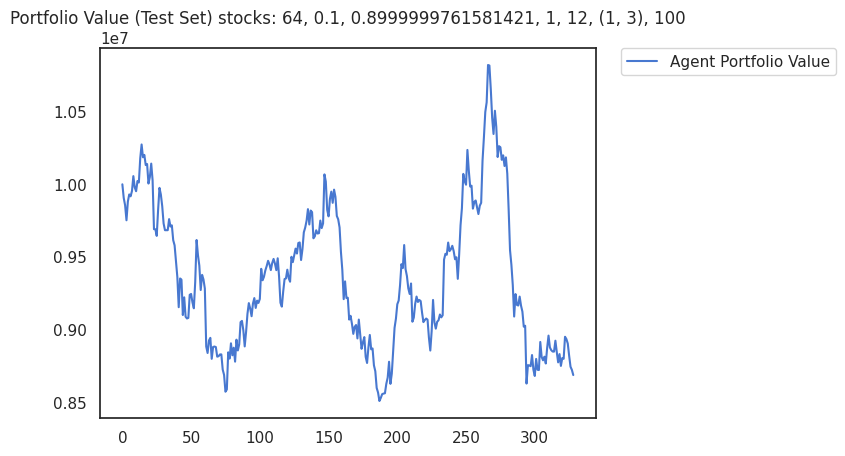

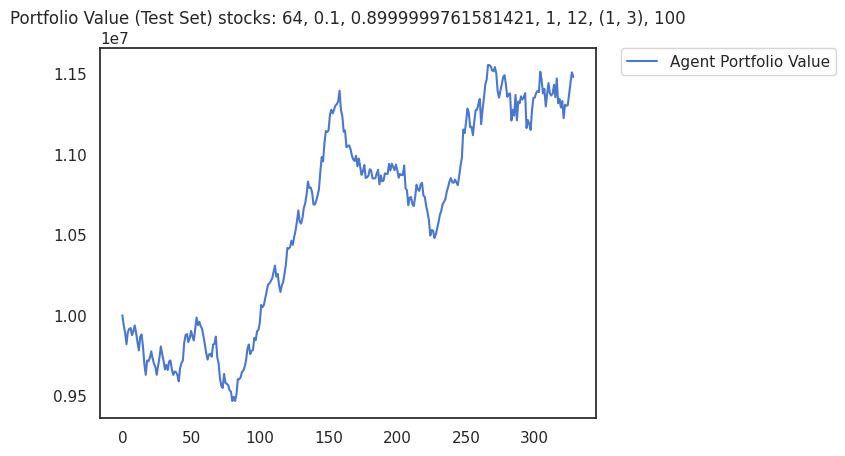

In [ ]:
#batch_size, learning, ratio_greedy, e, n, kernel1_size, n_batches, ratio_regul

data_type = "stocks"
list_stock = [i for i in range(m)]

for agent_idx, actor in enumerate(actors) :
    plt.title('Portfolio Value (Test Set) {}: {}, {}, {}, {}, {}, {}, {}'.format(data_type, batch_size, learning, ratio_greedy, e, n, kernel1_size, n_batches))
    plt.plot(p_list[agent_idx], label = 'Agent Portfolio Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    # final_pf_value = p_list[-1]
    # imp = (final_pf_value - pf_init_train)/pf_init_train
    # imp *= 100
    # tf.print(imp)